<a href="https://colab.research.google.com/github/marginli/NSYSU2021/blob/main/dnnMnist_DIY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


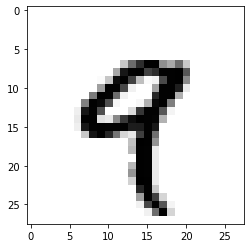

In [4]:
#plot an example
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [5]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [6]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [8]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
history=network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2564 - accuracy: 0.9265
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1030 - accuracy: 0.9700
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0681 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0498 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0371 - accuracy: 0.9891


In [10]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0711 - accuracy: 0.9796
test_acc: 0.9796000123023987


In [11]:
#in-class demo 5 (added on 2021/12/3)
from PIL import Image
import numpy as np

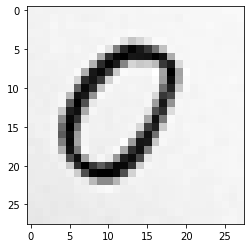

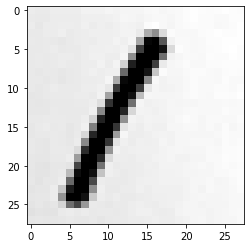

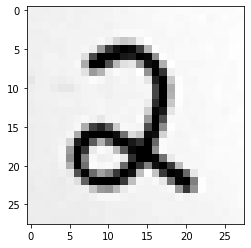

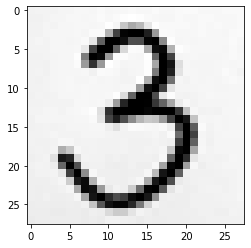

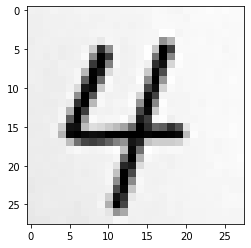

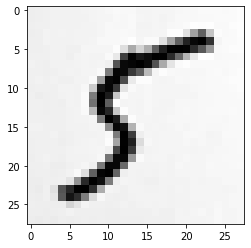

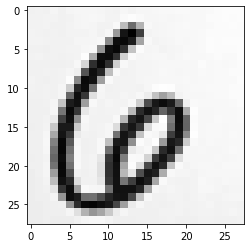

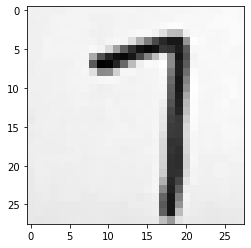

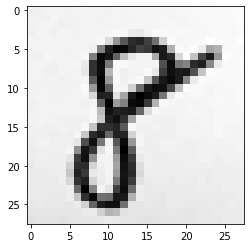

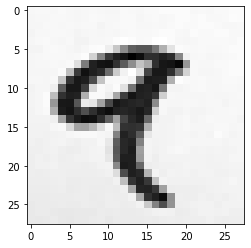

array([7, 2, 2, 3, 7, 5, 3, 7, 8, 8])

In [14]:
imglist=[]
WIDTH=28
HEIGHT=28
for ii in range(10):
    imgt=Image.open("/content/gdrive/MyDrive/workshop 2021Dec/WJLm-"+str(ii)+".png").convert('L')
    re_imgt=imgt.resize((WIDTH, HEIGHT))
    imgt_s=re_imgt.getdata()
#    imgt_array1=np. array(imgt_s).reshape((WIDTH,HEIGHT))/256 #for CNN
#    plt.imshow((imgt_array1-1)*(-1), cmap=plt.cm.binary)
#    plt.show()   
    imgt_array=np.array(imgt_s)/256
    imgt_array=(imgt_array-1)*(-1)
    imgt_array=(imgt_array-np.amin(imgt_array))/(np.amax(imgt_array)-np.amin(imgt_array))
    plt.imshow(imgt_array.reshape((WIDTH,HEIGHT)), cmap=plt.cm.binary)
    plt.show()
    imglist.append(imgt_array)
img_np=np.array(imglist)
#network.predict_classes(img_np)
np.argmax(network.predict(img_np),axis=-1)